   Vgs            Id            gm           gds           cgg      vth  \
0  0.0  2.212262e-11  5.981323e-10  1.809200e-11  9.881095e-17  0.45513   
1  0.1  3.389178e-10  9.298621e-09  2.567196e-10  9.268518e-17  0.45513   
2  0.2  5.335003e-09  1.475977e-07  4.148737e-09  8.781620e-17  0.45513   
3  0.3  8.474021e-08  2.327827e-06  6.738317e-08  8.672333e-17  0.45513   
4  0.4  1.145621e-06  2.658691e-05  8.777180e-07  1.214487e-16  0.45513   

         Length  
0  1.300000e-07  
1  1.300000e-07  
2  1.300000e-07  
3  1.300000e-07  
4  1.300000e-07  
[1.3e-07 5.0e-07 1.0e-06]


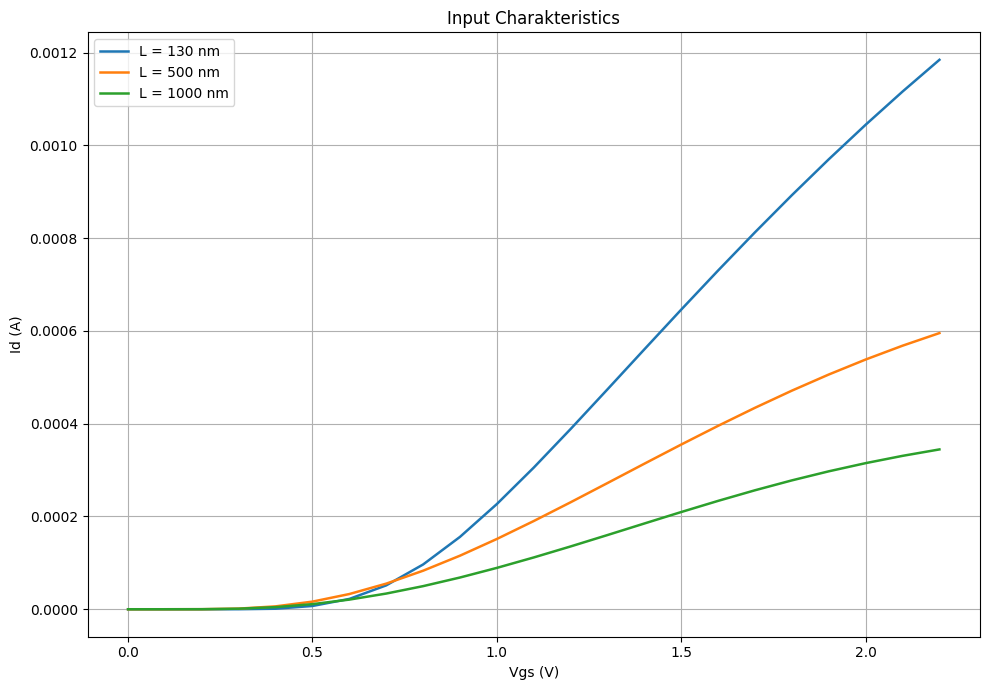

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load Data ===
file_path = "/home/marcin/Dokumente/PY/Projekt2/PY/test_gmid_130_500_1000.csv"
data = pd.read_csv(file_path)

# Expected columns: Vgs, Id, gm, gds, cgg, vth, Length
print(data.head())

# === Parameters ===
w = 1e-6  # transistor width

# === Compute derived quantities for each device length ===
lengths = data['Length'].unique()  # e.g. [0.13, 0.5, 1.0]

print(lengths)

plt.figure(figsize=(10, 7))

for L in lengths:
    sub = data[data['Length'] == L]

    vgs = sub['Vgs'].values
    id_ = sub['Id'].values
    gm = sub['gm'].values
    gds = sub['gds'].values
    cgg = sub['cgg'].values
    vth = sub['vth'].values

    # === Derived Quantities ===
    gm_id   = gm / id_
    vov     = vgs - vth
    gm_gds  = gm / gds
    ft      = gm / (2 * np.pi * cgg)
    id_w    = id_ / w
    ft_gmid = ft * gm_id

    # === Plot: gm/Id vs. Vov ===
    plt.plot(vgs, id_, label=f'L = {L*1e9:.0f} nm', linewidth=1.8)

plt.xlabel("Vgs (V)")
plt.ylabel("Id (A)")
plt.title("Input Charakteristics")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


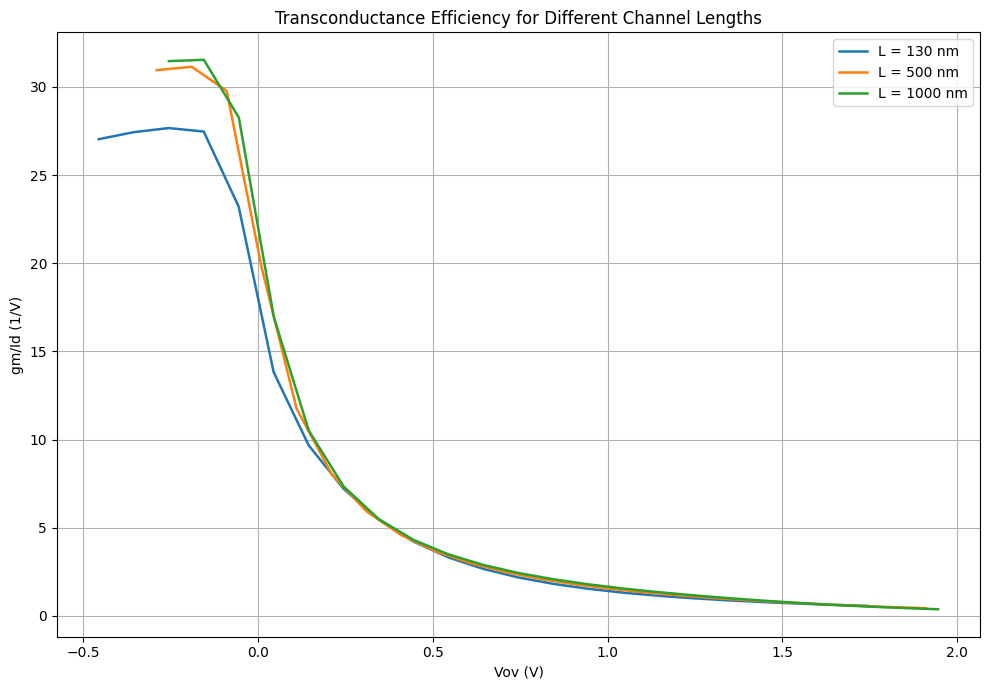

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load Data ===
file_path = "/home/marcin/Dokumente/PY/Projekt2/PY/test_gmid_130_500_1000.csv"
data = pd.read_csv(file_path)

# === Parameters ===
w = 1e-6  # transistor width

# === Compute derived quantities for each device length ===
lengths = data['Length'].unique()  # e.g. [0.13, 0.5, 1.0]

plt.figure(figsize=(10, 7))

for L in lengths:
    sub = data[data['Length'] == L]

    vgs = sub['Vgs'].values
    id_ = sub['Id'].values
    gm = sub['gm'].values
    gds = sub['gds'].values
    cgg = sub['cgg'].values
    vth = sub['vth'].values

    # === Derived Quantities ===
    gm_id   = gm / id_
    vov     = vgs - vth
    gm_gds  = gm / gds
    ft      = gm / (2 * np.pi * cgg)
    id_w    = id_ / w
    ft_gmid = ft * gm_id

    # === Plot: gm/Id vs. Vov ===
    plt.plot(vov, gm_id, label=f'L = {L*1e9:.0f} nm', linewidth=1.8)

plt.xlabel("Vov (V)")
plt.ylabel("gm/Id (1/V)")
plt.title("Transconductance Efficiency for Different Channel Lengths")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


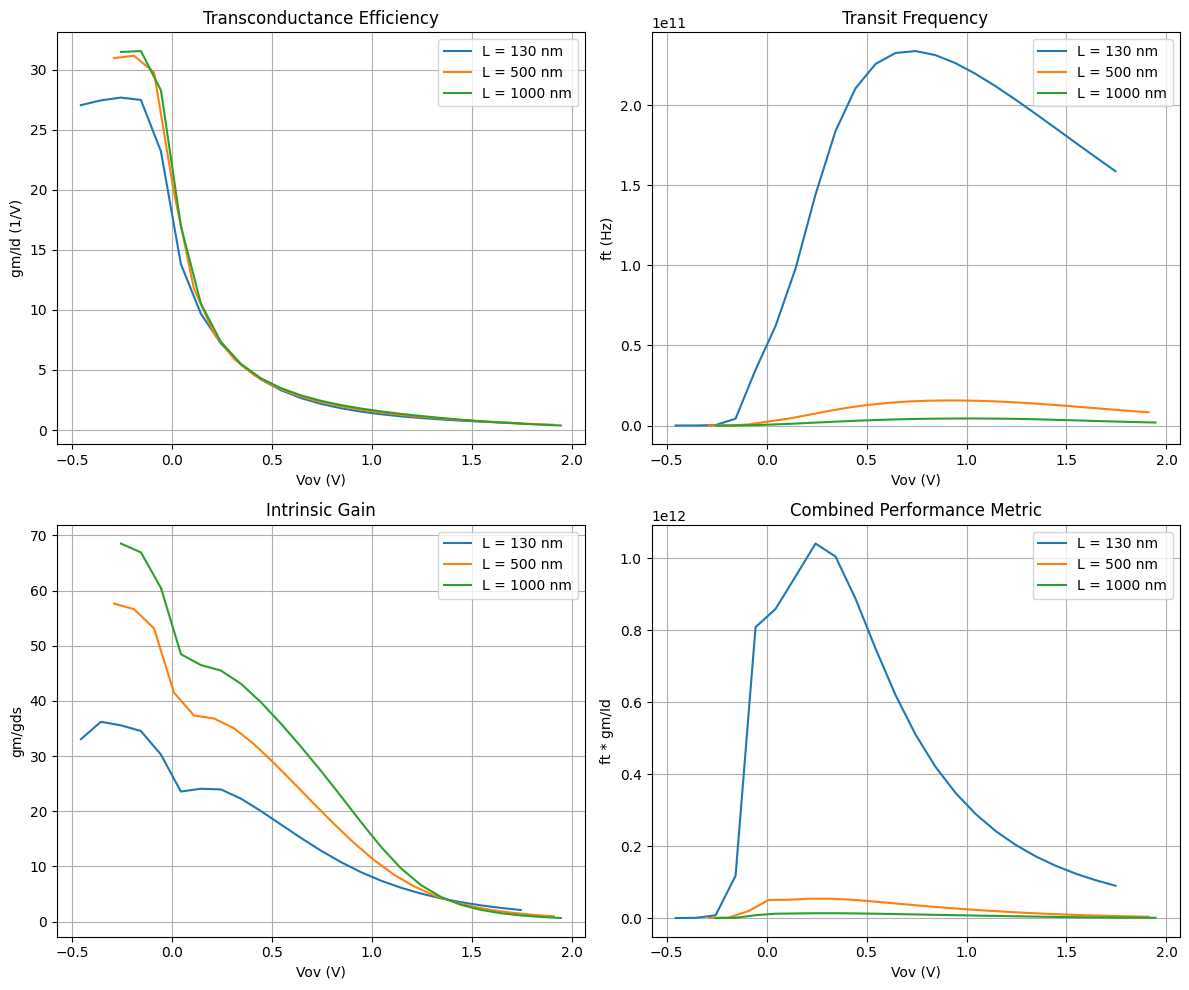

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load Data ===
file_path = "/home/marcin/Dokumente/PY/Projekt2/PY/test_gmid_130_500_1000.csv"
data = pd.read_csv(file_path)

# === Parameters ===
w = 1e-6  # transistor width

# === Compute derived quantities for each device length ===
lengths = data['Length'].unique()  # e.g. [0.13, 0.5, 1.0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for L in lengths:
    sub = data[data['Length'] == L]

    vgs = sub['Vgs'].values
    id_ = sub['Id'].values
    gm = sub['gm'].values
    gds = sub['gds'].values
    cgg = sub['cgg'].values
    vth = sub['vth'].values

    # === Derived Quantities ===
    gm_id   = gm / id_
    vov     = vgs - vth
    gm_gds  = gm / gds
    ft      = gm / (2 * np.pi * cgg)
    id_w    = id_ / w
    ft_gmid = ft * gm_id

    label = f"L = {L*1e9:.0f} nm"  # convert µm to nm for legend

    # Subplot 1: gm/Id
    axes[0, 0].plot(vov, gm_id, linewidth=1.5, label=label)
    axes[0, 0].set_xlabel("Vov (V)")
    axes[0, 0].set_ylabel("gm/Id (1/V)")
    axes[0, 0].set_title("Transconductance Efficiency")
    axes[0, 0].grid(True)

    # Subplot 2: ft
    axes[0, 1].plot(vov, ft, linewidth=1.5, label=label)
    axes[0, 1].set_xlabel("Vov (V)")
    axes[0, 1].set_ylabel("ft (Hz)")
    axes[0, 1].set_title("Transit Frequency")
    axes[0, 1].grid(True)

    # Subplot 3: gm/gds
    axes[1, 0].plot(vov, gm_gds, linewidth=1.5, label=label)
    axes[1, 0].set_xlabel("Vov (V)")
    axes[1, 0].set_ylabel("gm/gds")
    axes[1, 0].set_title("Intrinsic Gain")
    axes[1, 0].grid(True)

    # Subplot 4: ft * gm/Id
    axes[1, 1].plot(vov, ft_gmid, linewidth=1.5, label=label)
    axes[1, 1].set_xlabel("Vov (V)")
    axes[1, 1].set_ylabel("ft * gm/Id")
    axes[1, 1].set_title("Combined Performance Metric")
    axes[1, 1].grid(True)

# Add legends
for ax in axes.flat:
    ax.legend()

plt.tight_layout()
plt.show()




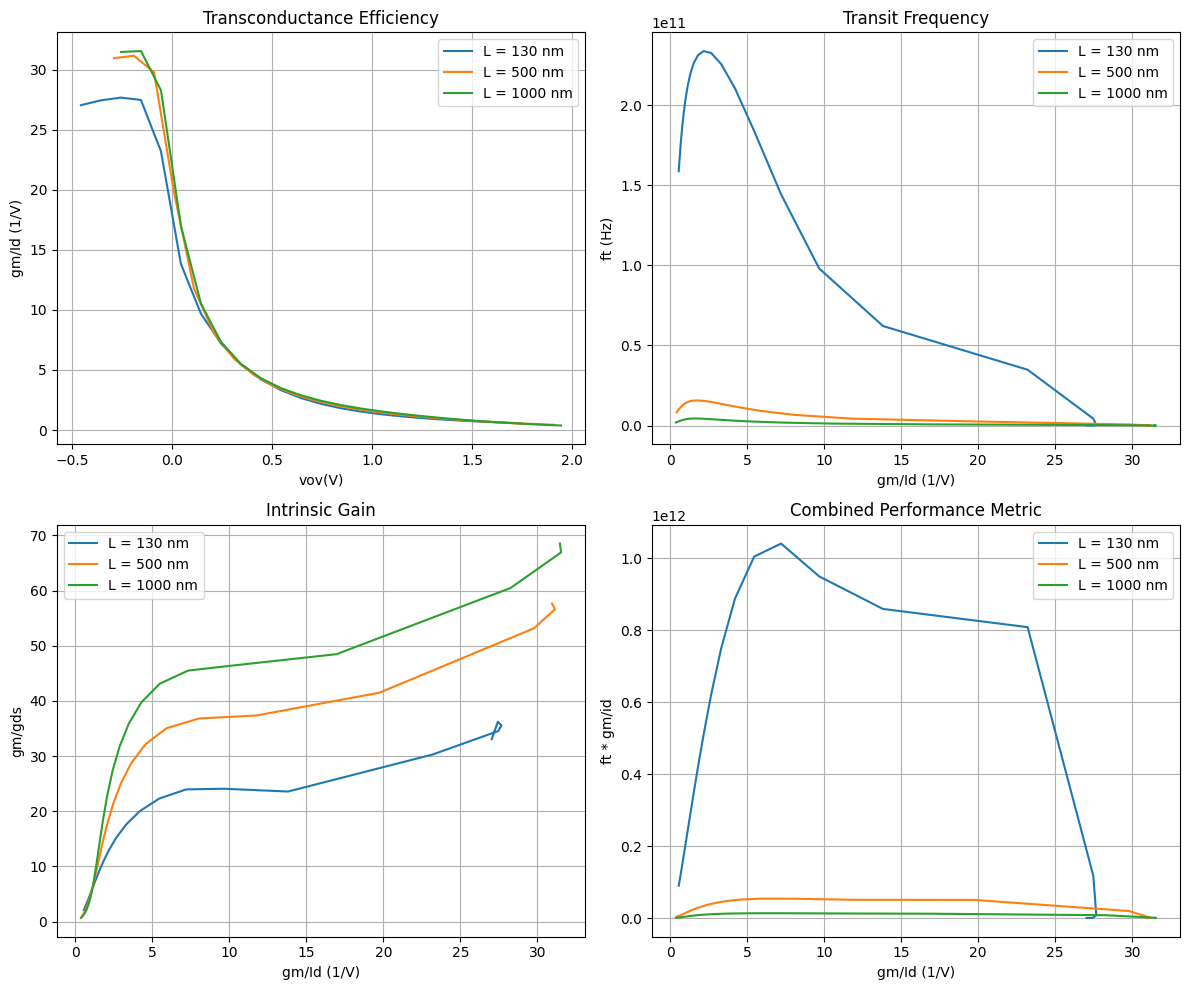

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load Data ===
file_path = "/home/marcin/Dokumente/PY/Projekt2/PY/test_gmid_130_500_1000.csv"
data = pd.read_csv(file_path)

# === Parameters ===
w = 1e-6  # transistor width

# === Compute derived quantities for each device length ===
lengths = data['Length'].unique()  # e.g. [0.13, 0.5, 1.0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for L in lengths:
    sub = data[data['Length'] == L]

    vgs = sub['Vgs'].values
    id_ = sub['Id'].values
    gm = sub['gm'].values
    gds = sub['gds'].values
    cgg = sub['cgg'].values
    vth = sub['vth'].values

    # === Derived Quantities ===
    gm_id   = gm / id_
    vov     = vgs - vth
    gm_gds  = gm / gds
    ft      = gm / (2 * np.pi * cgg)
    id_w    = id_ / w
    ft_gmid = ft * gm_id

    label = f"L = {L*1e9:.0f} nm"

    # Subplot 1
    plt.subplot(2, 2, 1)
    plt.plot(vov, gm_id, linewidth=1.5, label=label)
    plt.xlabel("vov(V)")
    plt.ylabel("gm/Id (1/V)")
    plt.title("Transconductance Efficiency")
    plt.grid(True)

    # Subplot 2
    plt.subplot(2, 2, 2)
    plt.plot(gm_id, ft, linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("ft (Hz)")
    plt.title("Transit Frequency")
    plt.grid(True)

    # Subplot 3
    plt.subplot(2, 2, 3)
    plt.plot(gm_id, gm_gds, linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("gm/gds")
    plt.title("Intrinsic Gain")
    plt.grid(True)

    # Subplot 4
    plt.subplot(2, 2, 4)
    plt.plot(gm_id, ft_gmid, linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("ft * gm/id")
    plt.title("Combined Performance Metric")
    plt.grid(True)

# Add legends
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.legend()

plt.tight_layout()
plt.show()


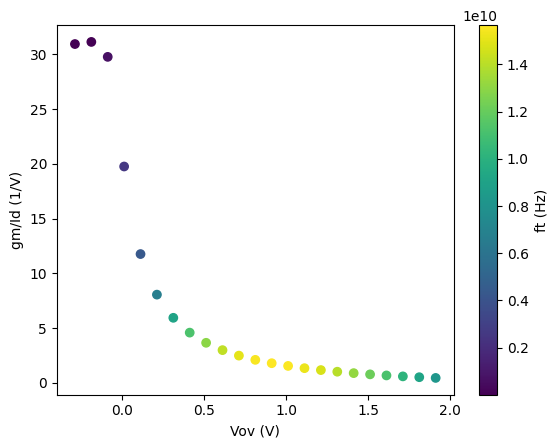

In [30]:
plt.scatter(vov, gm_id, c=ft, cmap='viridis')
plt.xlabel("Vov (V)")
plt.ylabel("gm/Id (1/V)")
plt.colorbar(label="ft (Hz)")
plt.show()


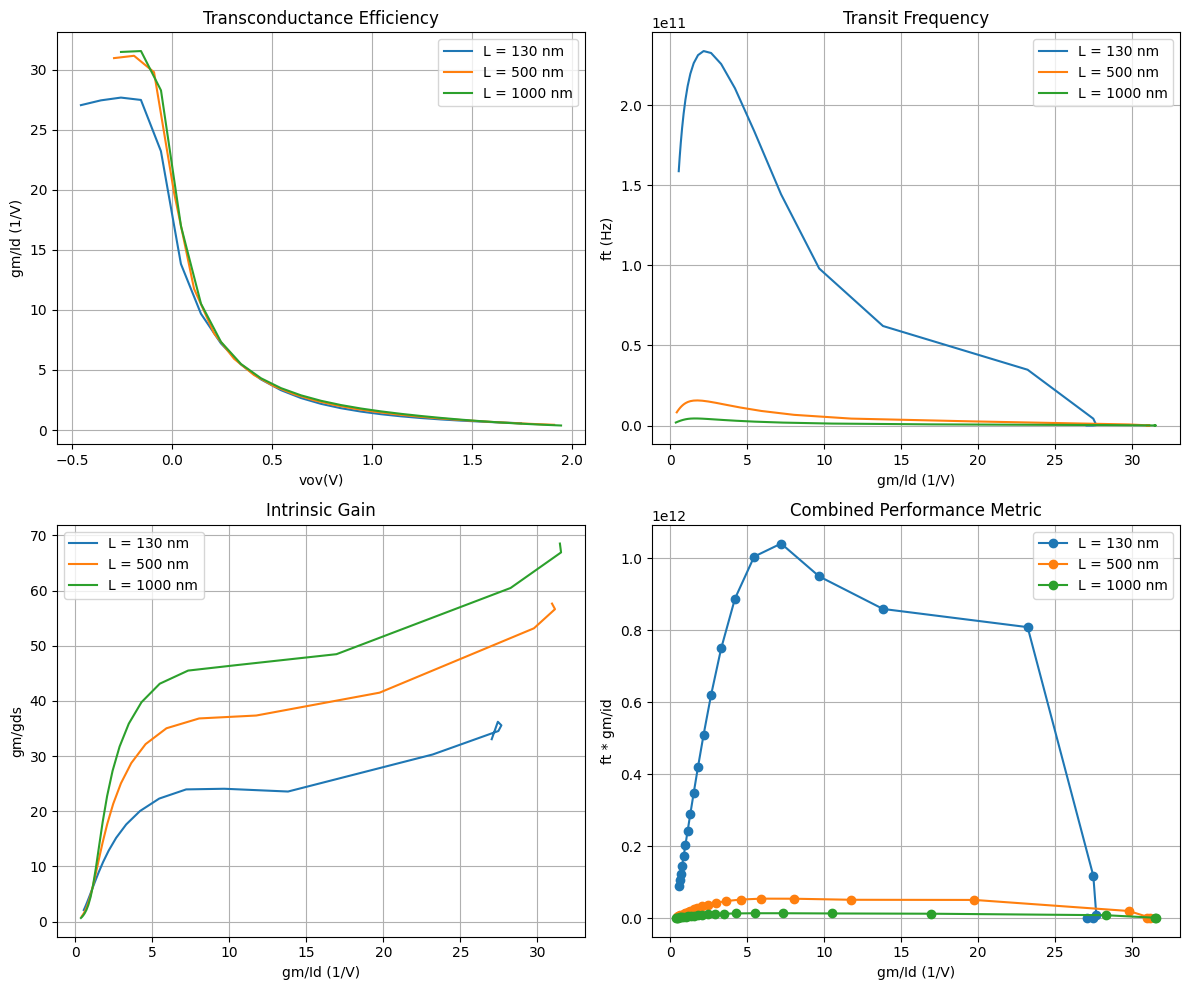

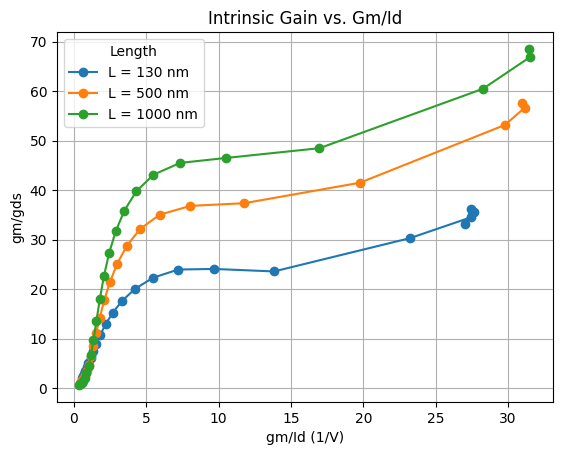

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Load Data ===
file_path = "/home/marcin/Dokumente/PY/Projekt2/PY/test_gmid_130_500_1000.csv"
data = pd.read_csv(file_path)

# === Parameters ===
w = 1e-6  # transistor width

# === Compute derived quantities for each device length ===
lengths = data['Length'].unique()  # e.g. [0.13, 0.5, 1.0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for L in lengths:
    sub = data[data['Length'] == L]

    vgs = sub['Vgs'].values
    id_ = sub['Id'].values
    gm = sub['gm'].values
    gds = sub['gds'].values
    cgg = sub['cgg'].values
    vth = sub['vth'].values

    # === Derived Quantities ===
    gm_id   = gm / id_
    vov     = vgs - vth
    gm_gds  = gm / gds
    ft      = gm / (2 * np.pi * cgg)
    id_w    = id_ / w
    ft_gmid = ft * gm_id

    label = f"L = {L*1e9:.0f} nm"

    # Subplot 1
    plt.subplot(2, 2, 1)
    plt.plot(vov, gm_id, linewidth=1.5, label=label)
    plt.xlabel("vov(V)")
    plt.ylabel("gm/Id (1/V)")
    plt.title("Transconductance Efficiency")
    plt.grid(True)

    # Subplot 2
    plt.subplot(2, 2, 2)
    plt.plot(gm_id, ft, linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("ft (Hz)")
    plt.title("Transit Frequency")
    plt.grid(True)

    # Subplot 3
    plt.subplot(2, 2, 3)
    plt.plot(gm_id, gm_gds, linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("gm/gds")
    plt.title("Intrinsic Gain")
    plt.grid(True)

    # Subplot 4
    plt.subplot(2, 2, 4)
    plt.plot(gm_id, ft_gmid, marker="o", linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("ft * gm/id")
    plt.title("Combined Performance Metric")
    plt.grid(True)

# Add legends
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.legend()

plt.tight_layout()
plt.show()

for L in lengths:
    sub = data[data['Length'] == L]

    vgs = sub['Vgs'].values
    id_ = sub['Id'].values
    gm = sub['gm'].values
    gds = sub['gds'].values
    cgg = sub['cgg'].values
    vth = sub['vth'].values

    # === Derived Quantities ===
    gm_id   = gm / id_
    vov     = vgs - vth
    gm_gds  = gm / gds
    ft      = gm / (2 * np.pi * cgg)
    id_w    = id_ / w
    ft_gmid = ft * gm_id

    label = f"L = {L*1e9:.0f} nm"
    
    # Plot on the same axes
    plt.plot(gm_id, gm_gds, marker="o", label=label, linewidth=1.5)

plt.title("Intrinsic Gain vs. Gm/Id")
plt.xlabel("gm/Id (1/V)")
plt.ylabel("gm/gds")
plt.grid(True)
plt.legend(title="Length")
plt.show()



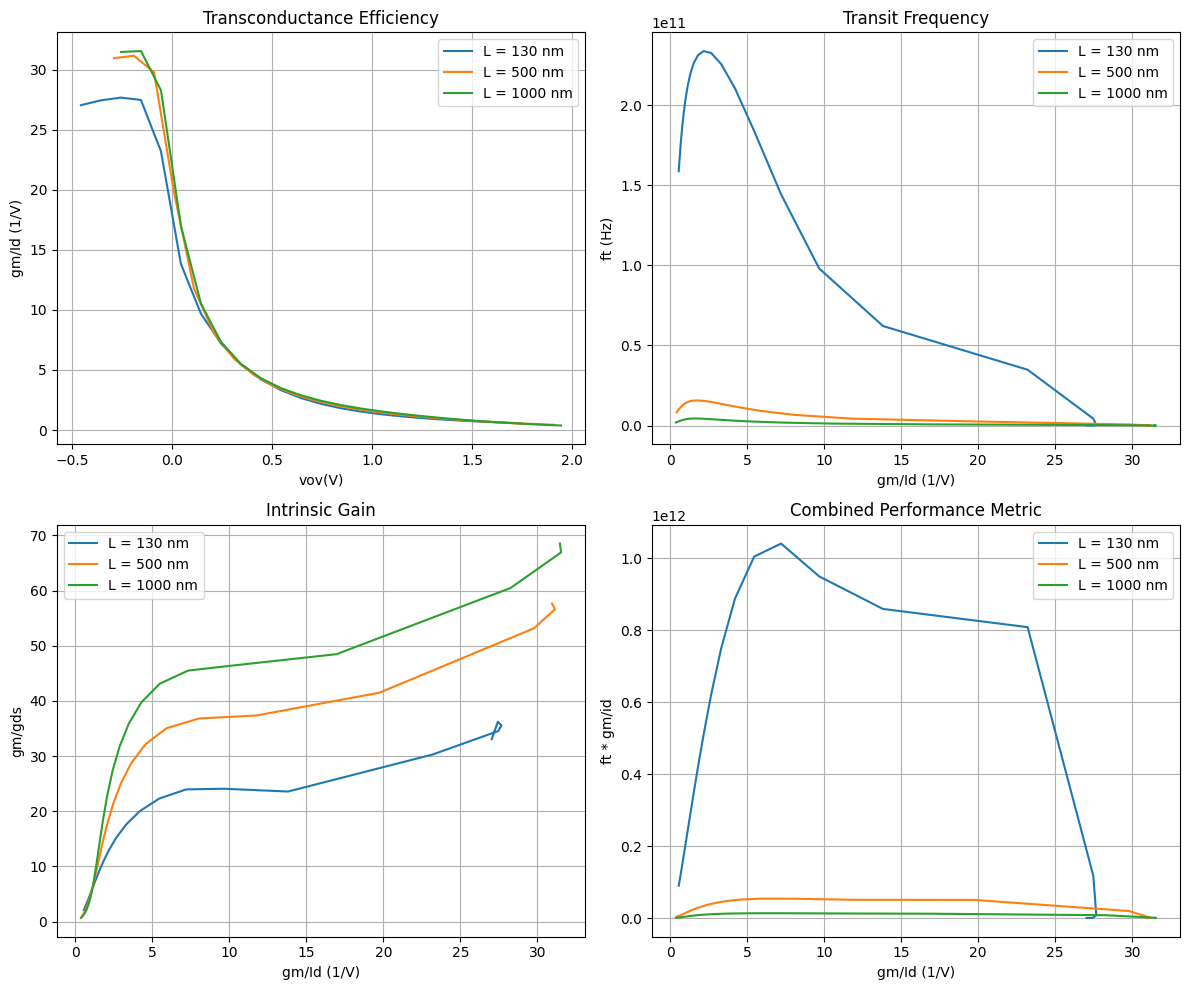

Loading BokehJS ...

<Figure size 640x480 with 0 Axes>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bokeh.plotting import figure, show, output_notebook

# === Load Data ===
file_path = "/home/marcin/Dokumente/PY/Projekt2/PY/test_gmid_130_500_1000.csv"
data = pd.read_csv(file_path)

# === Parameters ===
w = 1e-6  # transistor width

# === Compute derived quantities for each device length ===
lengths = data['Length'].unique()  # e.g. [0.13, 0.5, 1.0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for L in lengths:
    sub = data[data['Length'] == L]

    vgs = sub['Vgs'].values
    id_ = sub['Id'].values
    gm = sub['gm'].values
    gds = sub['gds'].values
    cgg = sub['cgg'].values
    vth = sub['vth'].values

    # === Derived Quantities ===
    gm_id   = gm / id_
    vov     = vgs - vth
    gm_gds  = gm / gds
    ft      = gm / (2 * np.pi * cgg)
    id_w    = id_ / w
    ft_gmid = ft * gm_id

    label = f"L = {L*1e9:.0f} nm"

    # Subplot 1
    plt.subplot(2, 2, 1)
    plt.plot(vov, gm_id, linewidth=1.5, label=label)
    plt.xlabel("vov(V)")
    plt.ylabel("gm/Id (1/V)")
    plt.title("Transconductance Efficiency")
    plt.grid(True)

    # Subplot 2
    plt.subplot(2, 2, 2)
    plt.plot(gm_id, ft, linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("ft (Hz)")
    plt.title("Transit Frequency")
    plt.grid(True)

    # Subplot 3
    plt.subplot(2, 2, 3)
    plt.plot(gm_id, gm_gds, linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("gm/gds")
    plt.title("Intrinsic Gain")
    plt.grid(True)

    # Subplot 4
    plt.subplot(2, 2, 4)
    plt.plot(gm_id, ft_gmid, linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("ft * gm/id")
    plt.title("Combined Performance Metric")
    plt.grid(True)

# Add legends
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.legend()

plt.tight_layout()
plt.show()

# Plot in Bokeh HTML
output_notebook()

# Assuming gm_id and gm_gds are defined numpy arrays or lists
plot = figure(title="Intrinsic Gain vs. Gm/Id",
              x_axis_label="gm/id",
              y_axis_label="gm/gds")

# === Plot all lengths ===
for L in lengths:
    sub = data[data['Length'] == L]

    vgs = sub['Vgs'].values
    id_ = sub['Id'].values
    gm = sub['gm'].values
    gds = sub['gds'].values
    cgg = sub['cgg'].values
    vth = sub['vth'].values

    # === Derived Quantities ===
    gm_id   = gm / id_
    gm_gds  = gm / gds

    label = f"L = {L*1e9:.0f} nm"

    # Add both line and markers to the same figure
    plot.line(gm_id, gm_gds, legend_label=label, line_width=1.5)

# === Final touches ===
plot.legend.title = "Channel Length"
plot.legend.location = "top_right"

show(plot)




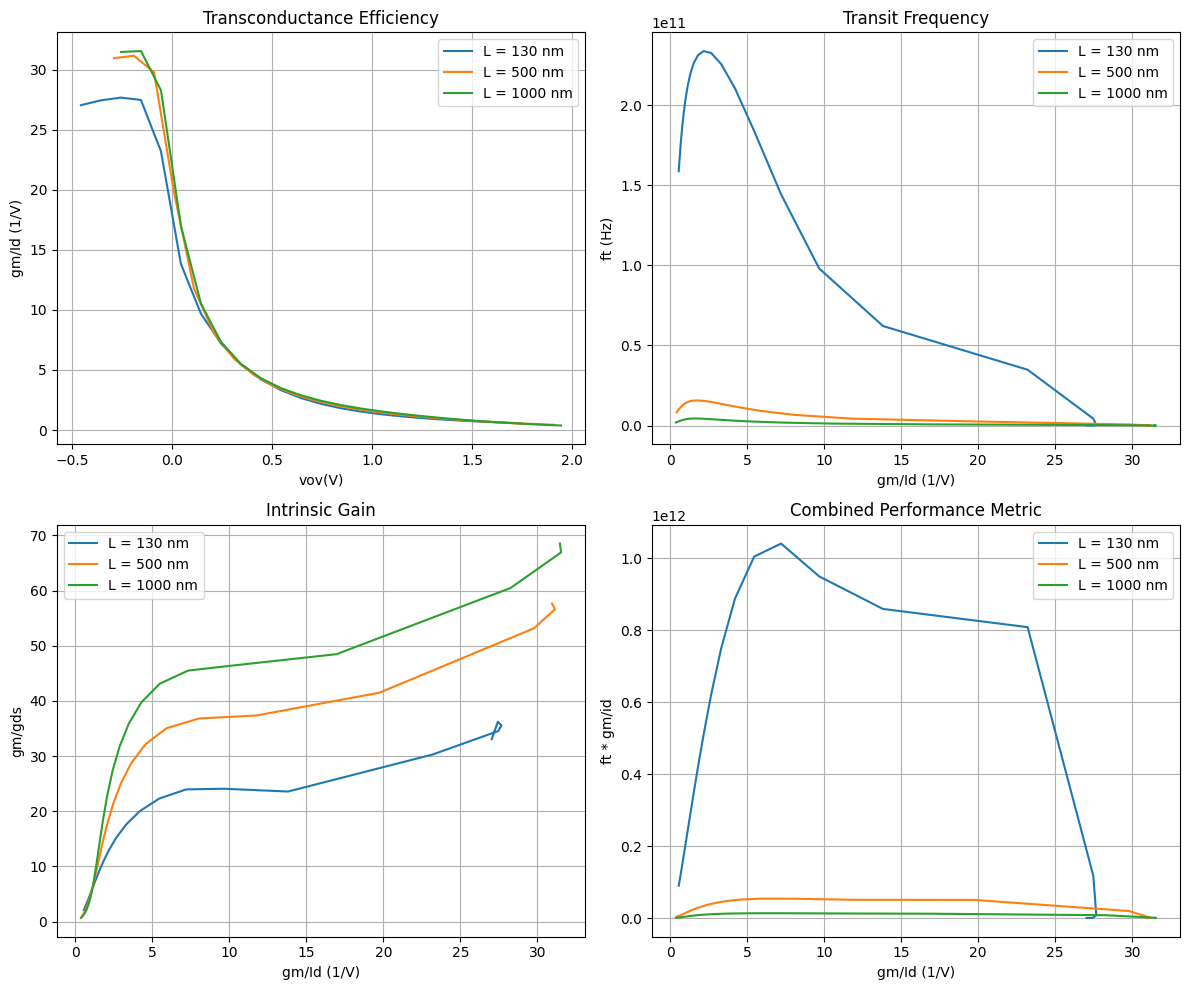

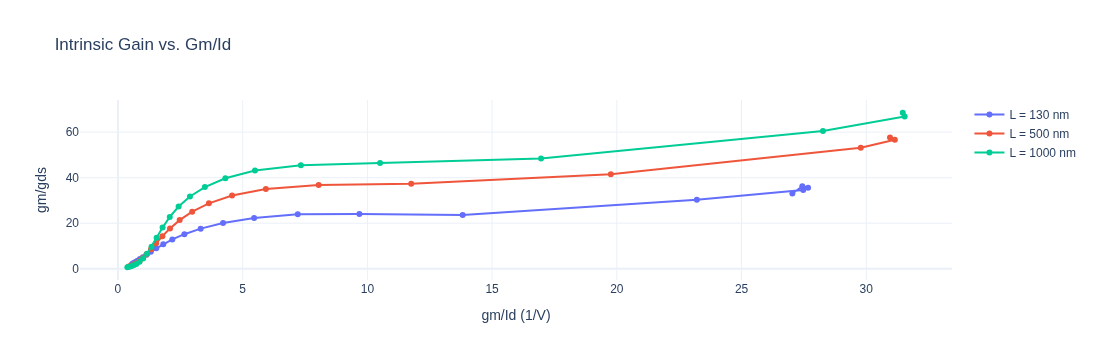

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

# === Load Data ===
file_path = "/home/marcin/Dokumente/PY/Projekt2/PY/test_gmid_130_500_1000.csv"
data = pd.read_csv(file_path)

# === Parameters ===
w = 1e-6  # transistor width

# === Compute derived quantities for each device length ===
lengths = data['Length'].unique()  # e.g. [0.13, 0.5, 1.0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for L in lengths:
    sub = data[data['Length'] == L]

    vgs = sub['Vgs'].values
    id_ = sub['Id'].values
    gm = sub['gm'].values
    gds = sub['gds'].values
    cgg = sub['cgg'].values
    vth = sub['vth'].values

    # === Derived Quantities ===
    gm_id   = gm / id_
    vov     = vgs - vth
    gm_gds  = gm / gds
    ft      = gm / (2 * np.pi * cgg)
    id_w    = id_ / w
    ft_gmid = ft * gm_id

    label = f"L = {L*1e9:.0f} nm"

    # Subplot 1
    plt.subplot(2, 2, 1)
    plt.plot(vov, gm_id, linewidth=1.5, label=label)
    plt.xlabel("vov(V)")
    plt.ylabel("gm/Id (1/V)")
    plt.title("Transconductance Efficiency")
    plt.grid(True)

    # Subplot 2
    plt.subplot(2, 2, 2)
    plt.plot(gm_id, ft, linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("ft (Hz)")
    plt.title("Transit Frequency")
    plt.grid(True)

    # Subplot 3
    plt.subplot(2, 2, 3)
    plt.plot(gm_id, gm_gds, linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("gm/gds")
    plt.title("Intrinsic Gain")
    plt.grid(True)

    # Subplot 4
    plt.subplot(2, 2, 4)
    plt.plot(gm_id, ft_gmid, linewidth=1.5, label=label)
    plt.xlabel("gm/Id (1/V)")
    plt.ylabel("ft * gm/id")
    plt.title("Combined Performance Metric")
    plt.grid(True)

# Add legends
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.legend()

plt.tight_layout()
#plt.savefig("plot.png")
plt.show()



# Create Plotly figure
fig = go.Figure()

# === Plot all lengths ===
for L in lengths:
    sub = data[data['Length'] == L]

    vgs = sub['Vgs'].values
    id_ = sub['Id'].values
    gm = sub['gm'].values
    gds = sub['gds'].values
    cgg = sub['cgg'].values
    vth = sub['vth'].values

    # === Derived Quantities ===
    gm_id   = gm / id_
    gm_gds  = gm / gds

    label = f"L = {L*1e9:.0f} nm"

    # Add both line and markers to the same figure
    fig.add_trace(go.Scatter(x=gm_id, y=gm_gds, mode='lines+markers', name=label))

fig.update_layout(
    title="Intrinsic Gain vs. Gm/Id",
    xaxis_title="gm/Id (1/V)",
    yaxis_title="gm/gds",
    template="plotly_white"
)

fig.show()


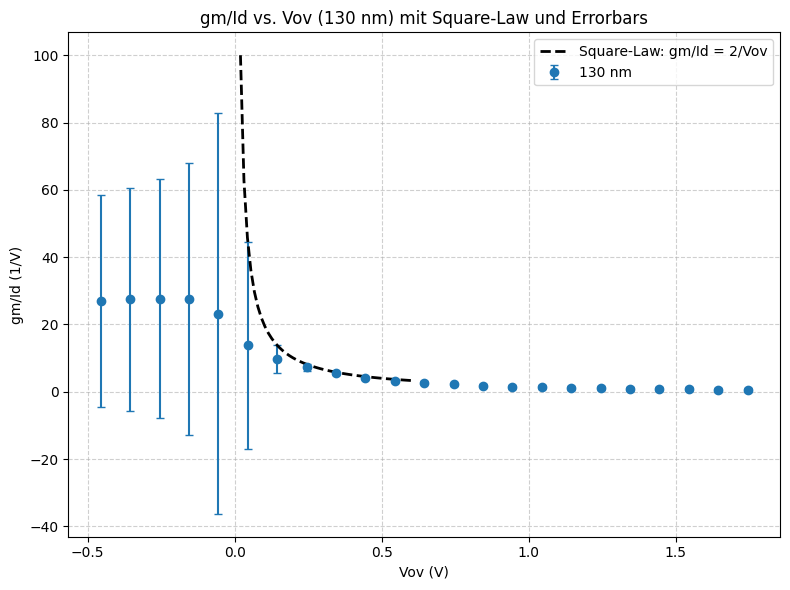

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Load Data ===
file_path = "/home/marcin/Dokumente/PY/Projekt2/PY/test_gmid_130_500_1000.csv"
data = pd.read_csv(file_path)

# === Parameters ===
w = 1e-6  # transistor width

# === Filter for 130nm devices ===
sub_130 = data[data['Length'] == 1.30e-07]

vgs = sub_130['Vgs'].values
id_ = sub_130['Id'].values
gm = sub_130['gm'].values
vth = sub_130['vth'].values

# === Derived Quantities ===
gm_id = gm / id_
vov = vgs - vth

# === Square-Law Reference for current Vov points ===
gm_id_square_local = 2 / vov

# === Errorbars: Abweichung real vs Square-Law ===
error = np.abs(gm_id - gm_id_square_local)

plt.figure(figsize=(8, 6))
plt.errorbar(vov, gm_id, yerr=error, fmt='o', label='130 nm', capsize=3)

# === Square-Law Reference Curve ===
vov_ref = np.linspace(0.02, 0.6, 50)
gm_id_square = 2 / vov_ref
plt.plot(vov_ref, gm_id_square, 'k--', linewidth=2, label='Square-Law: gm/Id = 2/Vov')

# === Plot Formatting ===
plt.xlabel("Vov (V)")
plt.ylabel("gm/Id (1/V)")
plt.title("gm/Id vs. Vov (130 nm) mit Square-Law und Errorbars")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_1050728/1548773804.py:16: FutureWarning: The provided callable <function mean at 0x746ec802f240> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = data.pivot_table(index='Width', columns='Length', values='ft_GHz', aggfunc=np.mean)


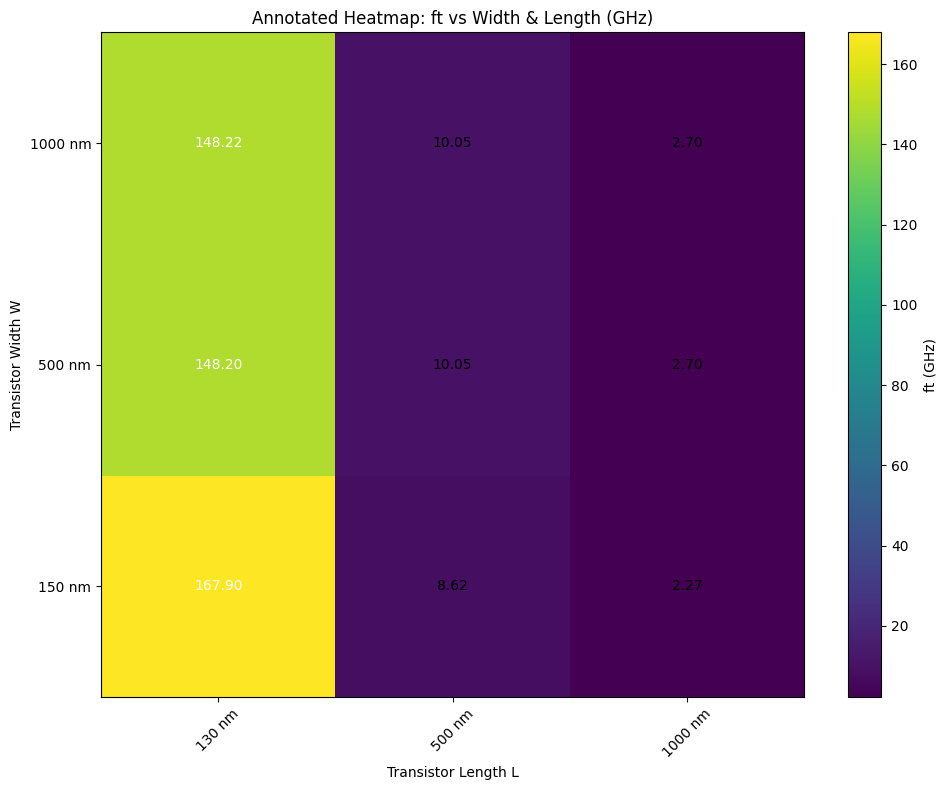

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Load Data ===
file_path = "/home/marcin/Dokumente/PY/Projekt2/PY/test_gmid_130_500_1000.csv"
data = pd.read_csv(file_path)

# === Compute derived quantities ===
# Transit frequency ft = gm / (2 * pi * cgg)
data['ft'] = data['gm'] / (2 * np.pi * data['cgg'])
data['ft_GHz'] = data['ft'] / 1e9  # in GHz

# === Pivot-Tabelle für Heatmap ===
# Zeilen = Width, Spalten = Length, Werte = ft_GHz
heatmap_data = data.pivot_table(index='Width', columns='Length', values='ft_GHz', aggfunc=np.mean)

# === Plot Heatmap ===
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, origin='lower', cmap='viridis', aspect='auto')

# Achsenbeschriftungen
lengths = heatmap_data.columns.values
widths = heatmap_data.index.values
plt.xticks(np.arange(len(lengths)), [f"{L*1e9:.0f} nm" for L in lengths], rotation=45)
plt.yticks(np.arange(len(widths)), [f"{W*1e9:.0f} nm" for W in widths])
plt.xlabel("Transistor Length L")
plt.ylabel("Transistor Width W")
plt.title("Annotated Heatmap: ft vs Width & Length (GHz)")

# Colorbar
cbar = plt.colorbar()
cbar.set_label("ft (GHz)")

# Annotate each cell
for i, W in enumerate(widths):
    for j, L in enumerate(lengths):
        ft_val = heatmap_data.loc[W, L]
        plt.text(j, i, f"{ft_val:.2f}", ha='center', va='center', 
                 color='white' if ft_val > heatmap_data.max().max()/2 else 'black')

plt.tight_layout()
plt.show()
